In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0
h=1
rho=1
eta1=0
eta2=0
blow=0.3
bhigh=0.4
nMAX=30

Tc_villain=0.33307

LLIST=[8, 16, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))

fig, ax1 = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,16))
fig.suptitle(r"3D XY model: $\nu=%s$; $e=%s$; $\eta=%s; nMAX=%s$" %(nu, e, eta2, nMAX))
ax1[0,0].set_xlabel(r"$\beta$")
ax1[0,0].set_ylabel(r"$\langle M_1 \rangle, \langle M_2 \rangle$")
ax1[0,1].set_ylabel(r"$\langle U_1 \rangle,  \langle U_2 \rangle$")
ax1[1,0].set_ylabel(r"$\langle L*\Upsilon_1 \rangle, \langle L*\Upsilon_2 \rangle$")
ax1[1,1].set_ylabel(r"$\langle L*\Upsilon_{sum} \rangle$")
ax1[2,0].set_ylabel(r"$\langle E \rangle$")
ax1[2,1].set_ylabel(r"$\langle C_v \rangle$")
ax1[0,0].set_xlim(0.3,0.38)
xticks = np.arange(0.3, 0.38, 0.02)
ax1[0,0].set_xticks(xticks)
ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()
ax1[2,0].grid()
ax1[2,1].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta2, eta2, e, h, nu, blow, bhigh, nMAX))
    
    #beta, M1, err_M1, M2, err_M2
    data_M=np.loadtxt("%s/Magnetization_phase.txt" %HOMEDIR)
    beta= data_M[0]
    M1= data_M[1]
    err_M1= data_M[2]
    M2= data_M[3]
    err_M2= data_M[4]
    data_U=np.loadtxt("%s/Binder_phase_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U1= data_U[1]
    err_U1= data_U[2]
    U2= data_U[3]
    err_U2= data_U[4]
    data_J= np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR)
    print(np.shape(data_J))
    beta= data_J[:, 0]
    J1= data_J[:,1]
    err_J1= data_J[:, 2]
    J2= data_J[:, 3]
    err_J2= data_J[:, 4]  
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    #beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_E=np.loadtxt("%s/Energy.txt" %HOMEDIR)
    beta= data_E[0]
    E= data_E[1]
    err_E= data_E[2]
    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
        #ax1[1,0].errorbar(beta, L*J1, yerr=err_J1, fmt="-", c=c_m, label="%s" %L)

    ax1[1,0].axvline(x=Tc_villain, ls="--", c="gray")
    ax1[0,1].axvline(x=Tc_villain, ls="--", c="gray")
    ax1[1,1].axvline(x=Tc_villain, ls="--", c="gray")
    ax1[2,1].axvline(x=Tc_villain, ls="--", c="gray")

    ax1[0,0].errorbar(beta, M1, yerr=err_M1, fmt="-", c=c_m, label="%s" %L)
    ax1[0,0].errorbar(beta, M2, yerr=err_M2 , fmt="--", c=c_m)
    ax1[0,1].errorbar(beta, U1, yerr=err_U1, fmt="-", c=c_m, label="%s" %L)
    ax1[0,1].errorbar(beta, U2, yerr=err_U2, fmt="--", c=c_m)
    ax1[1,0].errorbar(beta, L*J1,yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    ax1[1,0].errorbar(beta, L*J2, yerr=err_J2, fmt="--", c=c_m)
    ax1[1,1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt="-", c=c_m, label="%s" %L)
    ax1[2,0].errorbar(beta, E, yerr=err_E, fmt="-", c=c_m, label="%s" %L)
    ax1[2,1].errorbar(beta, Cv, yerr=err_Cv, fmt="-", c=c_m)
    
ax1[2,0].legend(loc="best", title="L")
#fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/PT_e%s_nu%s_eta%s_bmin%s_bmax%s.png" %(BASEDIR, e, nu, eta2, blow, bhigh) )



OSError: /Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_0/nu_0/eta2_0/h_1/L8_rho1_eta10_eta20_e0_h1_nu0_bmin0.3_bmax0.4_nMAX30_init0/Magnetization_phase.txt not found.

(64, 5)
(64, 5)


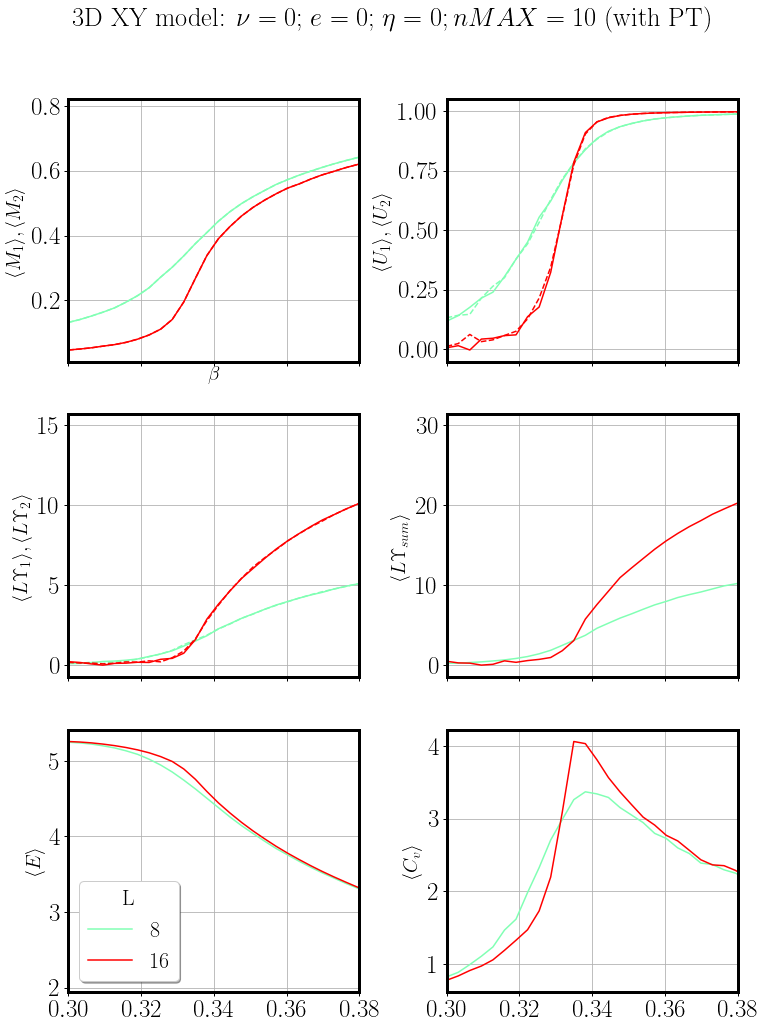

In [10]:


e=0
nu=0
h=1
rho=1
eta=0
blow=0.3
bhigh=0.5
nMAX=10

LLIST=[8, 16]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_%s/nu_%s/h_%s" %(e, nu, h))

fig, ax1 = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,16))
fig.suptitle(r"3D XY model: $\nu=%s$; $e=%s$; $\eta=%s; nMAX=%s$ (with PT)" %(nu, e, eta, nMAX))
ax1[0,0].set_xlabel(r"$\beta$")
ax1[0,0].set_ylabel(r"$\langle M_1 \rangle, \langle M_2 \rangle$")
ax1[0,1].set_ylabel(r"$\langle U_1 \rangle,  \langle U_2 \rangle$")
ax1[1,0].set_ylabel(r"$\langle L\Upsilon_1 \rangle, \langle L\Upsilon_2 \rangle$")
ax1[1,1].set_ylabel(r"$\langle L\Upsilon_{sum} \rangle$")
ax1[2,0].set_ylabel(r"$\langle E \rangle$")
ax1[2,1].set_ylabel(r"$\langle C_v \rangle$")
ax1[0,0].set_xlim(0.3,0.38)
xticks = np.arange(0.3, 0.38, 0.02)
ax1[0,0].set_xticks(xticks)
ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()
ax1[2,0].grid()
ax1[2,1].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta, e, h, nu, blow, bhigh, nMAX))
    
    #beta, M1, err_M1, M2, err_M2
    data_M=np.loadtxt("%s/Magnetization_phase.txt" %HOMEDIR)
    beta= data_M[0]
    M1= data_M[1]
    err_M1= data_M[2]
    M2= data_M[3]
    err_M2= data_M[4]
    data_U=np.loadtxt("%s/Binder_phase_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U1= data_U[1]
    err_U1= data_U[2]
    U2= data_U[3]
    err_U2= data_U[4]
    data_J= np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR)
    print(np.shape(data_J))
    beta= data_J[:, 0]
    J1= data_J[:,1]
    err_J1= data_J[:, 2]
    J2= data_J[:, 3]
    err_J2= data_J[:, 4]  
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    #beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_E=np.loadtxt("%s/Energy.txt" %HOMEDIR)
    beta= data_E[0]
    E= data_E[1]
    err_E= data_E[2]
    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0,0].plot(beta, M1, "-", c=c_m, label="%s" %L)
    ax1[0,0].plot(beta, M2, "--", c=c_m)
    ax1[0,1].plot(beta, U1, "-", c=c_m, label="%s" %L)
    ax1[0,1].plot(beta, U2, "--", c=c_m)
    ax1[1,0].plot(beta, L*J1, "-", c=c_m, label="%s" %L)
    #ax1[1,0].errorbar(beta, L*J1, yerr=err_J1, fmt="-", c=c_m, label="%s" %L)
    ax1[1,0].plot(beta, L*J2, "--", c=c_m)
    ax1[1,1].plot(beta, L*J_sum, "-", c=c_m, label="%s" %L)
    ax1[2,0].plot(beta, E, "-", c=c_m, label="%s" %L)
    ax1[2,1].plot(beta, Cv, "-", c=c_m)
    
ax1[2,0].legend(loc="best", title="L")
#fig.tight_layoutå
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/PT_e%s_nu%s_eta%s_bmin%s_bmax%s_nMAX%s.png" %(BASEDIR, e, nu, eta, blow, bhigh, nMAX) )



(64, 5)
(64, 5)


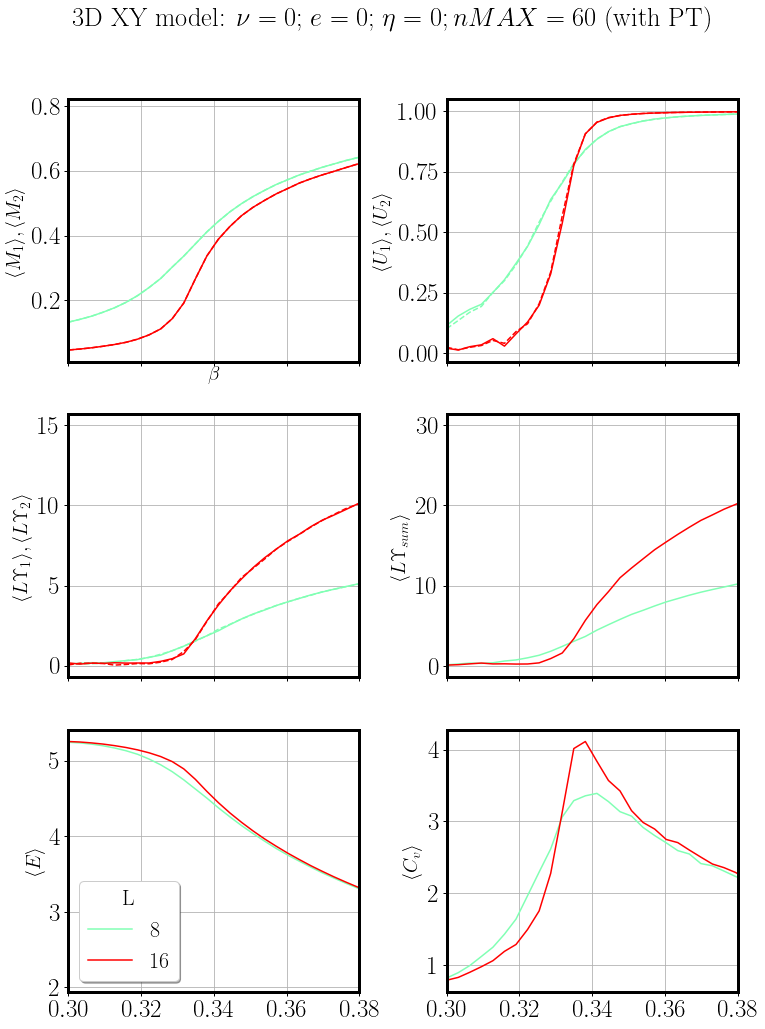

In [11]:


e=0
nu=0
h=1
rho=1
eta=0
blow=0.3
bhigh=0.5
nMAX=60

LLIST=[8, 16]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_%s/nu_%s/h_%s" %(e, nu, h))

fig, ax1 = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,16))
fig.suptitle(r"3D XY model: $\nu=%s$; $e=%s$; $\eta=%s; nMAX=%s$ (with PT)" %(nu, e, eta, nMAX))
ax1[0,0].set_xlabel(r"$\beta$")
ax1[0,0].set_ylabel(r"$\langle M_1 \rangle, \langle M_2 \rangle$")
ax1[0,1].set_ylabel(r"$\langle U_1 \rangle,  \langle U_2 \rangle$")
ax1[1,0].set_ylabel(r"$\langle L\Upsilon_1 \rangle, \langle L\Upsilon_2 \rangle$")
ax1[1,1].set_ylabel(r"$\langle L\Upsilon_{sum} \rangle$")
ax1[2,0].set_ylabel(r"$\langle E \rangle$")
ax1[2,1].set_ylabel(r"$\langle C_v \rangle$")
ax1[0,0].set_xlim(0.3,0.38)
xticks = np.arange(0.3, 0.38, 0.02)
ax1[0,0].set_xticks(xticks)
ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()
ax1[2,0].grid()
ax1[2,1].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta, e, h, nu, blow, bhigh, nMAX))
    
    #beta, M1, err_M1, M2, err_M2
    data_M=np.loadtxt("%s/Magnetization_phase.txt" %HOMEDIR)
    beta= data_M[0]
    M1= data_M[1]
    err_M1= data_M[2]
    M2= data_M[3]
    err_M2= data_M[4]
    data_U=np.loadtxt("%s/Binder_phase_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U1= data_U[1]
    err_U1= data_U[2]
    U2= data_U[3]
    err_U2= data_U[4]
    data_J= np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR)
    print(np.shape(data_J))
    beta= data_J[:, 0]
    J1= data_J[:,1]
    err_J1= data_J[:, 2]
    J2= data_J[:, 3]
    err_J2= data_J[:, 4]  
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    #beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_E=np.loadtxt("%s/Energy.txt" %HOMEDIR)
    beta= data_E[0]
    E= data_E[1]
    err_E= data_E[2]
    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0,0].plot(beta, M1, "-", c=c_m, label="%s" %L)
    ax1[0,0].plot(beta, M2, "--", c=c_m)
    ax1[0,1].plot(beta, U1, "-", c=c_m, label="%s" %L)
    ax1[0,1].plot(beta, U2, "--", c=c_m)
    ax1[1,0].plot(beta, L*J1, "-", c=c_m, label="%s" %L)
    #ax1[1,0].errorbar(beta, L*J1, yerr=err_J1, fmt="-", c=c_m, label="%s" %L)
    ax1[1,0].plot(beta, L*J2, "--", c=c_m)
    ax1[1,1].plot(beta, L*J_sum, "-", c=c_m, label="%s" %L)
    ax1[2,0].plot(beta, E, "-", c=c_m, label="%s" %L)
    ax1[2,1].plot(beta, Cv, "-", c=c_m)
    
ax1[2,0].legend(loc="best", title="L")
#fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/PT_e%s_nu%s_eta%s_bmin%s_bmax%s_nMAX%s.png" %(BASEDIR, e, nu, eta, blow, bhigh, nMAX) )



OSError: /Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_0/nu_0/h_1/L8_rho1_eta0_e0_h1_nu0_bmin0.3_bmax0.4_nMAX30_init0_noPT/Magnetization_phase.txt not found.

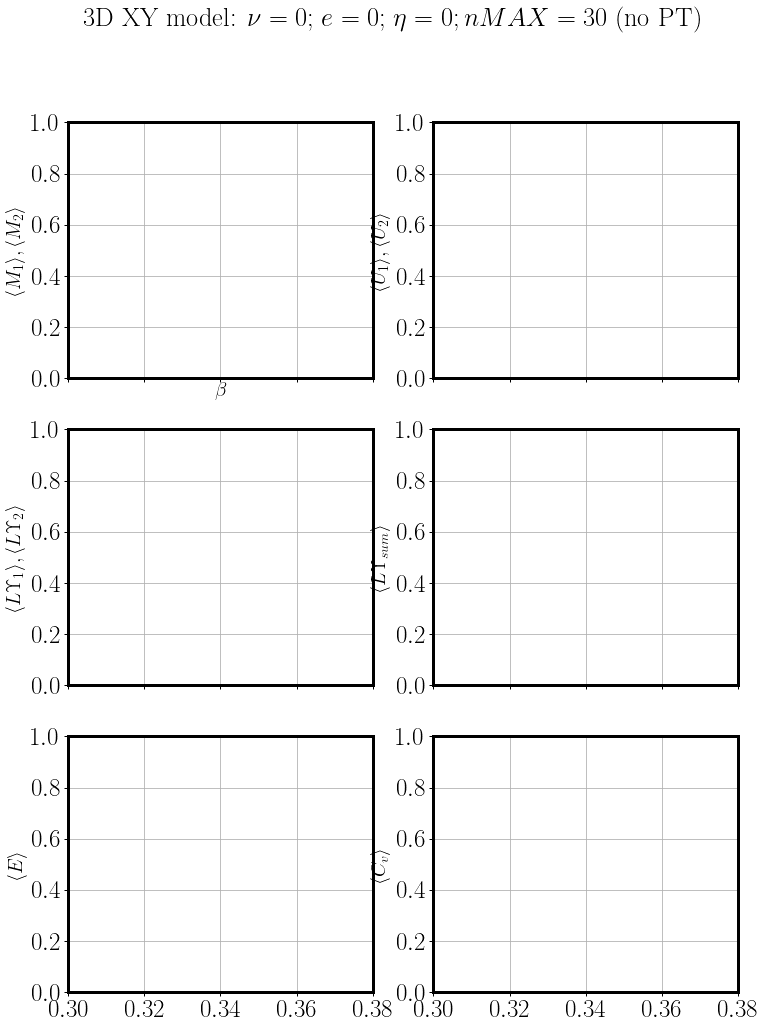

In [31]:


e=0
nu=0
h=1
rho=1
eta=0
blow=0.3
bhigh=0.4
nMAX=30

LLIST=[8, 16, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_%s/nu_%s/h_%s" %(e, nu, h))

fig, ax1 = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,16))
fig.suptitle(r"3D XY model: $\nu=%s$; $e=%s$; $\eta=%s; nMAX=%s$ (no PT)" %(nu, e, eta, nMAX))
ax1[0,0].set_xlabel(r"$\beta$")
ax1[0,0].set_ylabel(r"$\langle M_1 \rangle, \langle M_2 \rangle$")
ax1[0,1].set_ylabel(r"$\langle U_1 \rangle,  \langle U_2 \rangle$")
ax1[1,0].set_ylabel(r"$\langle L\Upsilon_1 \rangle, \langle L\Upsilon_2 \rangle$")
ax1[1,1].set_ylabel(r"$\langle L\Upsilon_{sum} \rangle$")
ax1[2,0].set_ylabel(r"$\langle E \rangle$")
ax1[2,1].set_ylabel(r"$\langle C_v \rangle$")
ax1[0,0].set_xlim(0.3,0.38)
xticks = np.arange(0.3, 0.38, 0.02)
ax1[0,0].set_xticks(xticks)
ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()
ax1[2,0].grid()
ax1[2,1].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0_noPT" %(BASEDIR, L, rho, eta, e, h, nu, blow, bhigh, nMAX))
    
    #beta, M1, err_M1, M2, err_M2
    data_M=np.loadtxt("%s/Magnetization_phase.txt" %HOMEDIR)
    beta= data_M[0]
    M1= data_M[1]
    err_M1= data_M[2]
    M2= data_M[3]
    err_M2= data_M[4]
    data_U=np.loadtxt("%s/Binder_phase_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U1= data_U[1]
    err_U1= data_U[2]
    U2= data_U[3]
    err_U2= data_U[4]
    data_J= np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR)
    print(np.shape(data_J))
    beta= data_J[:, 0]
    J1= data_J[:,1]
    err_J1= data_J[:, 2]
    J2= data_J[:, 3]
    err_J2= data_J[:, 4]  
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    #beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_E=np.loadtxt("%s/Energy.txt" %HOMEDIR)
    beta= data_E[0]
    E= data_E[1]
    err_E= data_E[2]
    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0,0].plot(beta, M1, "-", c=c_m, label="%s" %L)
    ax1[0,0].plot(beta, M2, "--", c=c_m)
    ax1[0,1].plot(beta, U1, "-", c=c_m, label="%s" %L)
    ax1[0,1].plot(beta, U2, "--", c=c_m)
    ax1[1,0].plot(beta, L*J1, "-", c=c_m, label="%s" %L)
    #ax1[1,0].errorbar(beta, L*J1, yerr=err_J1, fmt="-", c=c_m, label="%s" %L)
    ax1[1,0].plot(beta, L*J2, "--", c=c_m)
    ax1[1,1].plot(beta, L*J_sum, "-", c=c_m, label="%s" %L)
    ax1[2,0].plot(beta, E, "-", c=c_m, label="%s" %L)
    ax1[2,1].plot(beta, Cv, "-", c=c_m)
    
ax1[2,0].legend(loc="best", title="L")
#fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/noPT_e%s_nu%s_eta%s_bmin%s_bmax%s_nMAX%s.png" %(BASEDIR, e, nu, eta, blow, bhigh, nMAX) )



(64, 5)
(64, 5)
(64, 5)
(100, 64)


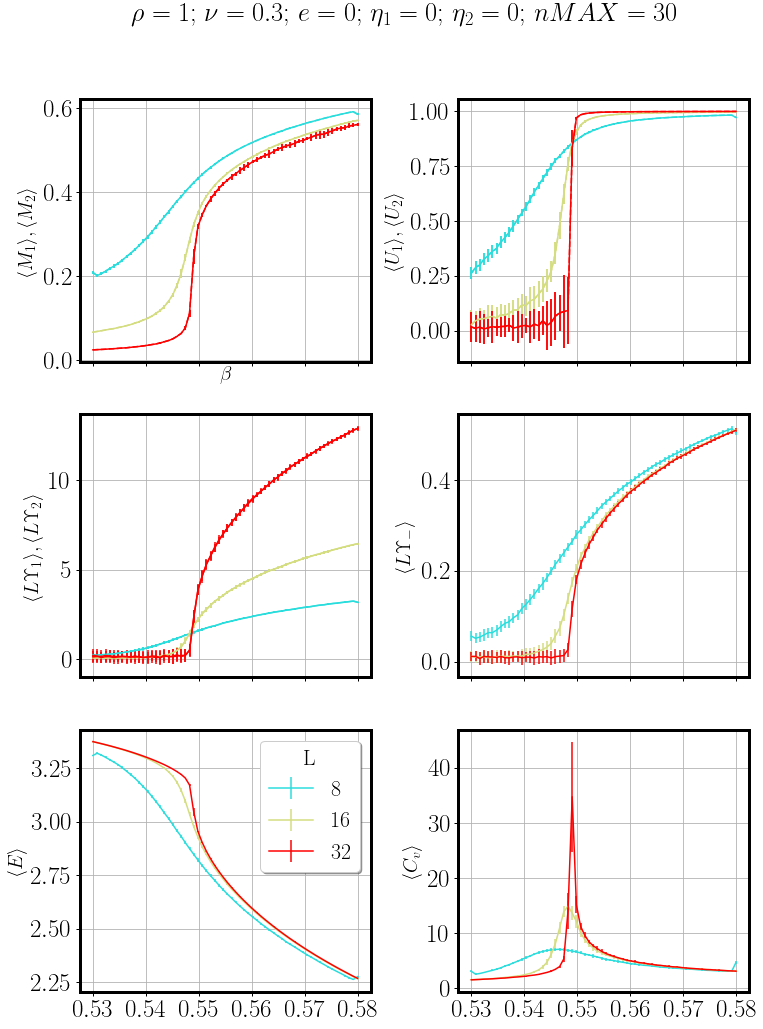

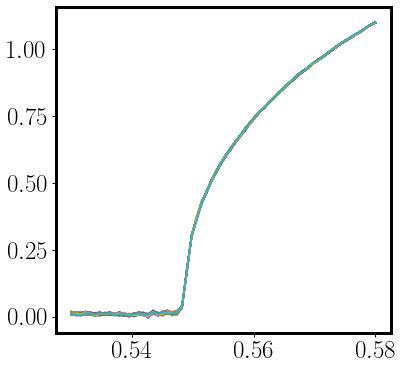

In [27]:


e=0
nu=0.3
h=1
rho=1
eta1=0
eta2=0
blow=0.53
bhigh=0.58
nMAX=30

LLIST=[8, 16, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_%s/nu_%s/h_%s" %(e, nu, h))

fig, ax1 = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,16))
fig.suptitle(r"$\rho=1$; $\nu=%s$; $e=%s$; $\eta_1=%s$; $\eta_2=%s$; $nMAX=%s$" %(nu, e, eta1, eta2, nMAX))
ax1[0,0].set_xlabel(r"$\beta$")
ax1[0,0].set_ylabel(r"$\langle M_1 \rangle, \langle M_2 \rangle$")
ax1[0,1].set_ylabel(r"$\langle U_1 \rangle,  \langle U_2 \rangle$")
ax1[1,0].set_ylabel(r"$\langle L\Upsilon_1 \rangle, \langle L\Upsilon_2 \rangle$")
#ax1[1,1].set_ylabel(r"$\langle L*\Upsilon_{+} \rangle$")
ax1[1,1].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")

ax1[2,0].set_ylabel(r"$\langle E \rangle$")
ax1[2,1].set_ylabel(r"$\langle C_v \rangle$")
xticks=([0.53, 0.54, 0.55, 0.56, 0.57, 0.58])
ax1[0,0].set_xticks(xticks)
ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()
ax1[2,0].grid()
ax1[2,1].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
    
    #beta, M1, err_M1, M2, err_M2
    data_M=np.loadtxt("%s/Magnetization_phase.txt" %HOMEDIR)
    beta= data_M[0]
    M1= data_M[1]
    err_M1= data_M[2]
    M2= data_M[3]
    err_M2= data_M[4]
    data_U=np.loadtxt("%s/Binder_phase_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U1= data_U[1]
    err_U1= data_U[2]
    U2= data_U[3]
    err_U2= data_U[4]
    data_J= np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR)
    print(np.shape(data_J))
    beta= data_J[:, 0]
    J1= data_J[:,1]
    err_J1= data_J[:, 2]
    J2= data_J[:, 3]
    err_J2= data_J[:, 4]  
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_E=np.loadtxt("%s/Energy.txt" %HOMEDIR)
    beta= data_E[0]
    E= data_E[1]
    err_E= data_E[2]
    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0,0].errorbar(beta, M1, yerr=err_M1, fmt="-", c=c_m, label="%s" %L)
    ax1[0,0].errorbar(beta, M2, yerr=err_M2, fmt="--", c=c_m)
    ax1[0,1].errorbar(beta, U1, yerr=err_U1, fmt="-", c=c_m, label="%s" %L)
    ax1[0,1].errorbar(beta, U2,yerr=err_U2, fmt="--", c=c_m)
    #ax1[1,0].plot(beta, J1, "-", c=c_m, label="%s" %L)
    ax1[1,0].errorbar(beta, L*J1, yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    #ax1[1,0].plot(beta, J2, "--", c=c_m)
    ax1[1,0].errorbar(beta, L*J2, yerr=L*err_J2, fmt="-", c=c_m, label="%s" %L)
    #ax1[1,1].plot(beta, J_sum, "-", c=c_m, label="%s" %L)
    ax1[1,1].errorbar(beta, J_diff, yerr=err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[2,0].errorbar(beta, E, yerr=err_E, fmt= "-", c=c_m, label="%s" %L)
    ax1[2,1].errorbar(beta, Cv,yerr=err_Cv, fmt=  "-", c=c_m)
#
#    
#    ax1[0,0].plot(beta, M1,"-", c=c_m, label="%s" %L)
#    ax1[0,0].plot(beta, M2, "--", c=c_m)
#    ax1[0,1].plot(beta, U1, "-", c=c_m, label="%s" %L)
#    ax1[0,1].plot(beta, U2, "--", c=c_m)
#    ax1[1,0].plot(beta, J1,"-", c=c_m, label="%s" %L)
#    ax1[1,0].plot(beta, J2, "-", c=c_m, label="%s" %L)
#    ax1[1,1].plot(beta, J_diff, "-", c=c_m, label="%s" %L)
#    ax1[2,0].plot(beta, E, "-", c=c_m, label="%s" %L)
#    ax1[2,1].plot(beta, Cv,  "-", c=c_m)
#    
ax1[2,0].legend(loc="best", title="L")
#fig.tight_layoutå
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/PT_e%s_nu%s_eta%s_bmin%s_bmax%s_nMAX%s.png" %(BASEDIR, e, nu, eta1, blow, bhigh, nMAX) )


Jsum_resampling= np.loadtxt("%s/J_sum_alln.txt" %HOMEDIR)

print(np.shape(Jsum_resampling))
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

for n in range(len(Jsum_resampling[:,0])):
    ax2.plot(beta, Jsum_resampling[n,:], "-")
plt.show()


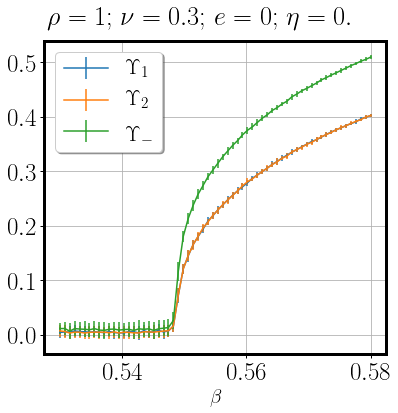

In [29]:
#EGIL FIGURE
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlabel(r"$\beta$")
fig.suptitle(r"$\rho=1$; $\nu=%s$; $e=%s$; $\eta=%s.$"%(nu, e, eta) )
#ax1.plot(beta, J1,"-", label=r"$\Upsilon_1$")
#ax1.plot(beta, J2,"-", label=r"$\Upsilon_2$")
ax1.errorbar(beta, J1, yerr=err_J1, fmt= "-", label=r"$\Upsilon_1$")
ax1.errorbar(beta, J2, yerr=err_J2, fmt= "-", label=r"$\Upsilon_2$")

#ax1.plot(beta, J_diff,"-", label=r"$\Upsilon_-$")
ax1.errorbar(beta, J_diff, yerr=err_J_diff, fmt= "-", label=r"$\Upsilon_-$")

#ax1.plot(beta, J_sum,"-", label=r"$\Upsilon_+$")
ax1.legend(loc="best")
ax1.grid()

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/Helicity_e%s_nu%s_eta%s_bmin%s_bmax%s_nMAX%s.png" %(BASEDIR, e, nu, eta, blow, bhigh, nMAX) )


(64, 5)
(64, 5)
(64, 5)


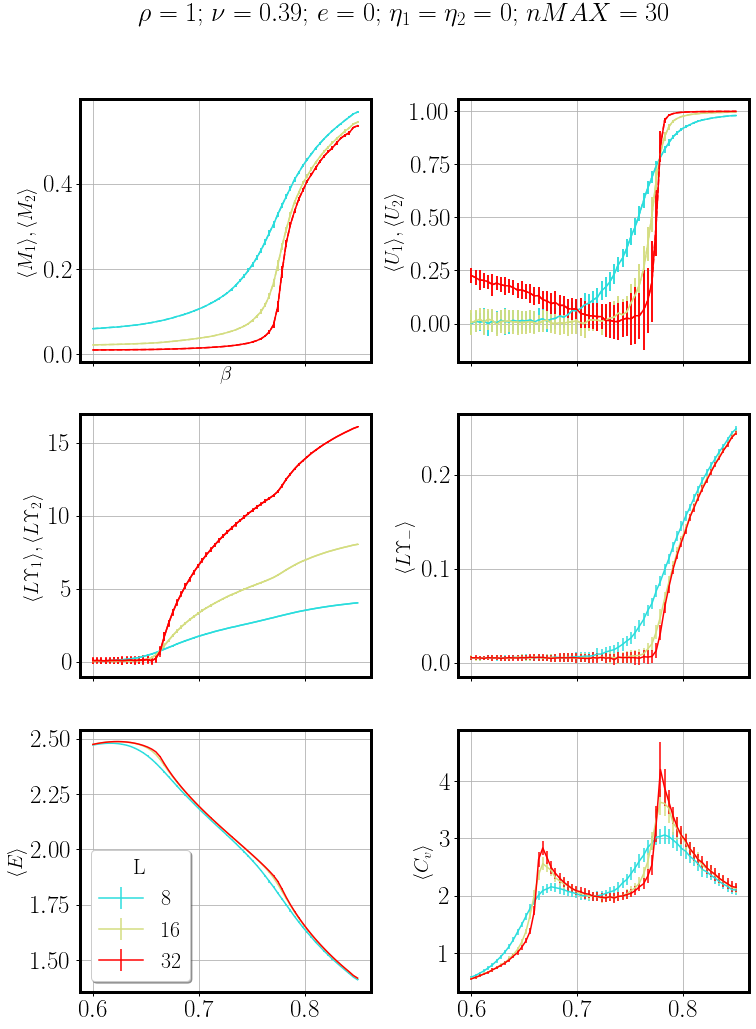

In [30]:


e=0
nu=0.39
h=1
rho=1
eta1=0
eta2=0
blow=0.6
bhigh=0.85
nMAX=30

LLIST=[8, 16, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/e_%s/nu_%s/h_%s" %(e, nu, h))

fig, ax1 = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,16))
fig.suptitle(r"$\rho=1$; $\nu=%s$; $e=%s$; $\eta_1=\eta_2=%s$; $nMAX=%s$" %(nu, e, eta2, nMAX))
ax1[0,0].set_xlabel(r"$\beta$")
ax1[0,0].set_ylabel(r"$\langle M_1 \rangle, \langle M_2 \rangle$")
ax1[0,1].set_ylabel(r"$\langle U_1 \rangle,  \langle U_2 \rangle$")
ax1[1,0].set_ylabel(r"$\langle L\Upsilon_1 \rangle, \langle L\Upsilon_2 \rangle$")
#ax1[1,1].set_ylabel(r"$\langle L*\Upsilon_{+} \rangle$")
ax1[1,1].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")

ax1[2,0].set_ylabel(r"$\langle E \rangle$")
ax1[2,1].set_ylabel(r"$\langle C_v \rangle$")

#ax1[0,0].set_xticks(xticks)
ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()
ax1[2,0].grid()
ax1[2,1].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
    
    #beta, M1, err_M1, M2, err_M2
    data_M=np.loadtxt("%s/Magnetization_phase.txt" %HOMEDIR)
    beta= data_M[0]
    M1= data_M[1]
    err_M1= data_M[2]
    M2= data_M[3]
    err_M2= data_M[4]
    data_U=np.loadtxt("%s/Binder_phase_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U1= data_U[1]
    err_U1= data_U[2]
    U2= data_U[3]
    err_U2= data_U[4]
    data_J= np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR)
    print(np.shape(data_J))
    beta= data_J[:, 0]
    J1= data_J[:,1]
    err_J1= data_J[:, 2]
    J2= data_J[:, 3]
    err_J2= data_J[:, 4]  
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_E=np.loadtxt("%s/Energy.txt" %HOMEDIR)
    beta= data_E[0]
    E= data_E[1]
    err_E= data_E[2]
    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0,0].errorbar(beta, M1, yerr=err_M1, fmt="-", c=c_m, label="%s" %L)
    ax1[0,0].errorbar(beta, M2, yerr=err_M2, fmt="--", c=c_m)
    ax1[0,1].errorbar(beta, U1, yerr=err_U1, fmt="-", c=c_m, label="%s" %L)
    ax1[0,1].errorbar(beta, U2,yerr=err_U2, fmt="--", c=c_m)
    #ax1[1,0].plot(beta, J1, "-", c=c_m, label="%s" %L)
    ax1[1,0].errorbar(beta, L*J1, yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    #ax1[1,0].plot(beta, J2, "--", c=c_m)
    ax1[1,0].errorbar(beta, L*J2, yerr=L*err_J2, fmt="-", c=c_m, label="%s" %L)
    #ax1[1,1].plot(beta, J_sum, "-", c=c_m, label="%s" %L)
    ax1[1,1].errorbar(beta, J_diff, yerr=err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[2,0].errorbar(beta, E, yerr=err_E, fmt= "-", c=c_m, label="%s" %L)
    ax1[2,1].errorbar(beta, Cv,yerr=err_Cv, fmt=  "-", c=c_m)

    
#    ax1[0,0].plot(beta, M1,"-", c=c_m, label="%s" %L)
#    ax1[0,0].plot(beta, M2, "--", c=c_m)
#    ax1[0,1].plot(beta, U1, "-", c=c_m, label="%s" %L)
#    ax1[0,1].plot(beta, U2, "--", c=c_m)
#    ax1[1,0].plot(beta, J1,"-", c=c_m, label="%s" %L)
#    ax1[1,0].plot(beta, J2, "-", c=c_m, label="%s" %L)
#    ax1[1,1].plot(beta, J_diff, "-", c=c_m, label="%s" %L)
#    ax1[2,0].plot(beta, E, "-", c=c_m, label="%s" %L)
#    ax1[2,1].plot(beta, Cv,  "-", c=c_m)
    
ax1[2,0].legend(loc="best", title="L")
#fig.tight_layoutå
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/PT_e%s_nu%s_eta%s_bmin%s_bmax%s_nMAX%s.png" %(BASEDIR, e, nu, eta1, blow, bhigh, nMAX) )



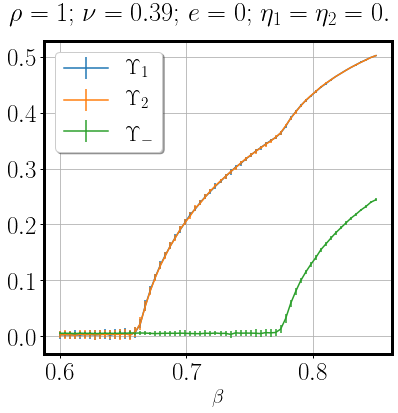

In [26]:
#EGIL FIGURE
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlabel(r"$\beta$")
fig.suptitle(r"$\rho=1$; $\nu=%s$; $e=%s$; $\eta_1=\eta_2=%s.$"%(nu, e, eta) )
ax1.errorbar(beta, J1, yerr= err_J1, fmt="-", label=r"$\Upsilon_1$")
ax1.errorbar(beta, J2, yerr= err_J2, fmt="-", label=r"$\Upsilon_2$")
ax1.errorbar(beta, J_diff, yerr= err_J_diff, fmt="-", label=r"$\Upsilon_-$")
#ax1.plot(beta, J_sum,"-", label=r"$\Upsilon_+$")
ax1.legend(loc="best")
ax1.grid()

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/Helicity_e%s_nu%s_eta%s_bmin%s_bmax%s_nMAX%s.png" %(BASEDIR, e, nu, eta, blow, bhigh, nMAX) )
